# Task 2 
To create a model which able to predict intents of a sentence. There will be four kind of intents will be there
seller, buyer, neutral and seller buyer. The data is unlabeled having noise data and different types of
sentences are present having links and other description

In [1]:
# importing basic libraries

import pandas as pd
import numpy as np
from scipy.stats import zscore
from wordcloud import WordCloud

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk

# import warnings 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading out.csv file

df=pd.read_csv("C:/Users/HP/Downloads/out.csv")
pd.set_option('display.max_columns',None)
print(df.head(),df.shape)

                                   _id                        Id  \
0  {"$oid":"5b1aa7ee8bb55b300895a775"}  5b1aa7ee8bb55b300895a774   
1  {"$oid":"5b1aa7ee8bb55b300895a777"}  5b1aa7ee8bb55b300895a776   
2  {"$oid":"5b1aa7ee8bb55b300895a779"}  5b1aa7ee8bb55b300895a778   
3  {"$oid":"5b1aa7ee8bb55b300895a77b"}  5b1aa7ee8bb55b300895a77a   
4  {"$oid":"5b1aa7ee8bb55b300895a77d"}  5b1aa7ee8bb55b300895a77c   

                              GroupId                    GroupName  \
0  {"$numberLong":"1124374080936565"}  Empower Your Online Success   
1  {"$numberLong":"1124374080936565"}  Empower Your Online Success   
2  {"$numberLong":"1124374080936565"}  Empower Your Online Success   
3  {"$numberLong":"1124374080936565"}  Empower Your Online Success   
4  {"$numberLong":"1124374080936565"}  Empower Your Online Success   

                               PostId PostType    UserProfileId  \
0  {"$numberLong":"2171117736262189"}    IMAGE       1348490940   
1  {"$numberLong":"2170670772973552"

In [3]:
# see null values

df.isnull().sum()

_id                             0
Id                              0
GroupId                         0
GroupName                      30
PostId                          0
PostType                        0
UserProfileId                   0
ProfileName                   184
ProfileImage                    0
ProfileImageOriginal            0
Message                         0
FeedText                    34974
FeedDescription            117505
FeedTitle                  152328
postImgUrl                  60040
postImgUrlOriginal          60040
videoTitle                 201886
VideoSiteRedirectionUrl    201886
VideoDescription           201886
PostRedirectionImg         201886
websiteUrl                 201886
NoOfLike                        0
NoOfComment                     0
NoOfShare                       0
DateTimeOfPost                  0
connectionStatus                0
postUrl                         0
DestinationURL             166070
savePostDateTimeUtc             0
mediaPostUrlUp

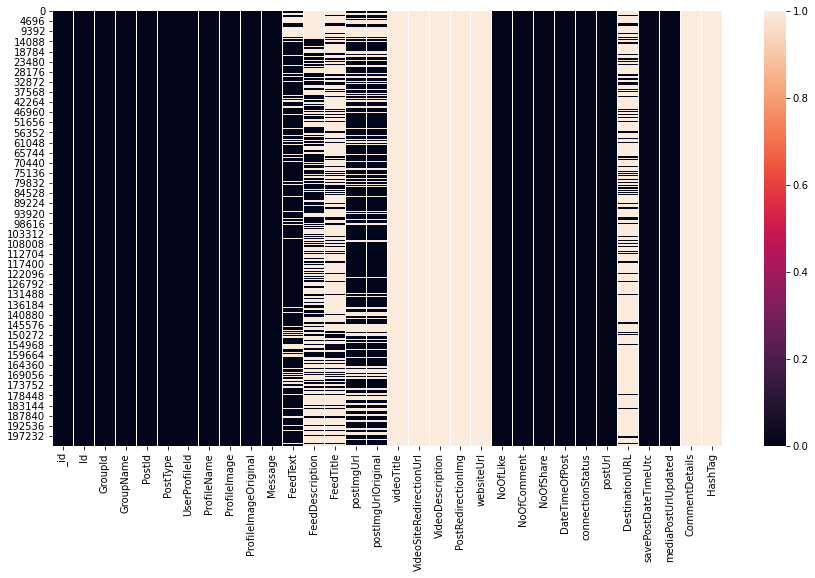

In [4]:
# ploting null values on heatmap

plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())
plt.show()

In [5]:
# droping null columns

null_col=["videoTitle","VideoSiteRedirectionUrl","VideoDescription","PostRedirectionImg","websiteUrl","CommentDetails","HashTag","connectionStatus"]
df.drop(null_col,inplace=True,axis=1)
df.shape

(201886, 24)

In [6]:
# Summary statistics

df.describe(include="all")

,_id,Id,GroupId,GroupName,PostId,PostType,UserProfileId,ProfileName,ProfileImage,ProfileImageOriginal,Message,FeedText,FeedDescription,FeedTitle,postImgUrl,postImgUrlOriginal,NoOfLike,NoOfComment,NoOfShare,DateTimeOfPost,postUrl,DestinationURL,savePostDateTimeUtc,mediaPostUrlUpdated
count,201886,201886,201886,201856,201886,201886,201886,201702,201886,201886,201886,166912,84381,49558,141846,141846,201886.000000,201886.000000,201886.000000,2.018860e+05,201886,35816,2.018860e+05,201886
unique,201886,201886,1795,1896,200471,3,90255,87420,201886,113840,167313,144985,66361,32347,140006,131723,NaN,NaN,NaN,NaN,200466,31314,NaN,2
top,"{""$oid"":""5bf8e85b8bb55b31dc7825e8""}",5d0d17d9a3df6325d8c449a6,"{""$numberLong"":""660080627366565""}",Affiliate Marketing - Worldwide,"{""$numberLong"":""886421821725315""}",IMAGE,quit,Arbu Usmani,https://api.socioleadspro.com/api/Media/getpro...,http://graph.facebook.com/quit/picture?type=large,,\r,This attachment may have been removed or the p...,Attachment Unavailable,https://video.fblr2-1.fna.fbcdn.net/v/t42.9040...,https://external.fblr2-1.fna.fbcdn.net/safe_im...,NaN,NaN,NaN,NaN,https://www.facebook.com/groups/26352776233635...,https://play.google.com/store/apps/details?id=...,NaN,True
freq,1,1,21689,21689,4,132804,6047,431,1,6047,7469,1019,2219,2191,11,116,NaN,NaN,NaN,NaN,5,55,NaN,183898
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.923437,2.905967,0.714542,1.532334e+09,NaN,NaN,1.541116e+09,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.812459,42.495071,117.381459,3.926891e+07,NaN,NaN,1.039411e+07,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.298916e+09,NaN,NaN,1.528474e+09,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.532057e+09,NaN,NaN,1.532528e+09,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.538632e+09,NaN,NaN,1.539264e+09,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,0.000000,1.543853e+09,NaN,NaN,1.544793e+09,NaN


In [7]:
# loop to see unique and frequncy

for i in df.columns:
    print('*************************',i,'***************************')
    print('Null values:',df[i].isnull().sum())
    u=df[i].unique()
    c=df[i].value_counts()
    print("Unique:---------------------\n",len(u),u) 
    print("Counts:---------------------\n",c)
    print("\n")

************************* _id ***************************
Null values: 0
Unique:---------------------
 201886 ['{"$oid":"5b1aa7ee8bb55b300895a775"}'
 '{"$oid":"5b1aa7ee8bb55b300895a777"}'
 '{"$oid":"5b1aa7ee8bb55b300895a779"}' ...
 '{"$oid":"5d11b7e7a3df6323f881ab7e"}'
 '{"$oid":"5d11b7e7a3df6323f881ab80"}'
 '{"$oid":"5d11b7e7a3df6323f881ab82"}']
Counts:---------------------
 {"$oid":"5bf8e85b8bb55b31dc7825e8"}    1
{"$oid":"5b3740ac8bb55b2d483abb80"}    1
{"$oid":"5be919dd8bb55b246855d56a"}    1
{"$oid":"5bd7e4448bb55b06b84dcd8a"}    1
{"$oid":"5c77b71b8bb55b2ba46027f9"}    1
                                      ..
{"$oid":"5bb5bdcf8bb55b331c5b7138"}    1
{"$oid":"5d020707a3df631ec81b8af3"}    1
{"$oid":"5b48846d8bb55b21e4c5f584"}    1
{"$oid":"5b1ab5488bb55b300895acb3"}    1
{"$oid":"5b9ba7bb8bb55b02c40152eb"}    1
Name: _id, Length: 201886, dtype: int64


************************* Id ***************************
Null values: 0
Unique:---------------------
 201886 ['5b1aa7ee8bb55b300

Unique:---------------------
 167313 [' Youre about to GET LUCKY! Rise and shine. HAPPY FRIDAY ALLSTARS!!\r\n Today&#039;s you&#039;re lucky day fellow WINNER!! (click on www.visitthesite.com... QUICKLY)\r\n See More '
 ' Rest up, tomorrows a BIG DAY.\r\n You&#039;re alot closer than you realize ALLSTARS!\r\n (http://go.visitthesite.com/... NOW &amp; &#064; WAKEUP)\r\n See More '
 ' Start PRESSING with FORWARD moving people!\r\n Good Evening ALLSTARS!\r\n (www.visitthesite.com... REPEATEDLY)\r\n See More '
 ... 'MANY SR Best Amazing Clip Movie 😲 Best Amazing Clip Movie 😲'
 'Yoyozhu  Aruide was founded in 2012, which is professional in research, development, production and sales of blast chiller & freezer. Our main products are blast freezer..., stainless steel refrigerator, fermenting room, vacuum blast freezer, and other customized products falling into more than 300 models. “Quality reliable, innovative breakthroughs, customer satisfaction, continuous improvement” is our company’s qu

Unique:---------------------
 144986 ['Youre about to GET LUCKY! Rise and shine. HAPPY FRIDAY ALLSTARS!!\r\n Today&#039;s you&#039;re lucky day fellow WINNER!! (click on www.visitthesite.com... QUICKLY)\r\n See More'
 'Rest up, tomorrows a BIG DAY.\r\n You&#039;re alot closer than you realize ALLSTARS!\r\n (http://go.visitthesite.com/... NOW &amp; &#064; WAKEUP)\r\n See More'
 'Start PRESSING with FORWARD moving people!\r\n Good Evening ALLSTARS!\r\n (www.visitthesite.com... REPEATEDLY)\r\n See More'
 ...
 'تقدر تستفيد الان من شرح المحاضره الأولي لكورس الـ(PMI-ACP) من خلال الرابط: http://bit.ly/2J6adrlكمان تقدر تحمل الـ(Presentation) الخاص بالمحاضرة الأولي من خلال الرابط التالي: http://bit.ly/2wc4hqPوبأنتظاركم غدا أن شاء الله الساعه السابعه بتوقيت القاهره (8 بتوقيت الرياض) في المحاضره الثانيه من خلال الرابط التالي: http://bit.ly/2J6adrlملحوظة: الحضور أونلاين أو بمقر الشركة بإسبقية الحجزشكرا لكم...فريق عمل #بورتوليرنللإستفسار00201000130125 See Translation'
 'Best Amazing Clip Movie 😲'
 


************************* postImgUrl ***************************
Null values: 60040
Unique:---------------------
 140007 ['https://api.socioleadspro.com/api/Media/get?id=b23fefa0-e1c2-412d-a3bc-2c917e6cac43.jpg'
 'https://api.socioleadspro.com/api/Media/get?id=472e91ad-a3f0-4d07-95fc-758412fa24ee.jpg'
 'https://api.socioleadspro.com/api/Media/get?id=808c3496-ab81-4b43-bb23-6aa23e5e616f.jpg'
 ...
 'https://drive.google.com/file/d/1xtzYwq4LM6UOUCvyDcjGlixmPOtD_qCF/preview'
 'https://scontent.fblr2-1.fna.fbcdn.net/v/t1.0-9/65462425_133837547818377_1270182744671911936_o.jpg?_nc_cat=100&_nc_oc=AQlVk__nKYobHzWnzW1suPiHRIpVsuAeTF7E66l14EHAjeUwZYfMi3CZdl2QVP9wP8c&_nc_ht=scontent.fblr2-1.fna&oh=ee67f6460b6540b9b7fb0efa15593ff4&oe=5D7DE0F4||https://scontent.fblr2-1.fna.fbcdn.net/v/t1.0-9/65015999_133837567818375_1878987366673154048_o.jpg?_nc_cat=111&_nc_oc=AQkAVfm0n_6g_9I7Sxvrw2W_iXnscj4HxdK20evHTbaTYhtQoBeUQ9qDgn5NldxA4oQ&_nc_ht=scontent.fblr2-1.fna&oh=6bc7cb6a8993f1eb3ac8e1ea435bfd1b&oe=5D816

Unique:---------------------
 1229 [   0    1    2 ...  608 2592 1939]
Counts:---------------------
 0       129317
1        20233
2         9561
3         5766
4         3859
         ...  
1076         1
948          1
820          1
2741         1
2094         1
Name: NoOfLike, Length: 1229, dtype: int64


************************* NoOfComment ***************************
Null values: 0
Unique:---------------------
 340 [    0     4     1     2     3     8    16     6    23    22    29    26
    18    24     7     5    28    13    30    50     9    20    45    34
    27    33    17    25    42    40    11    10    14    38    21    62
    43    15    54    32   374   101    12    71    19    94    35    48
    78    53    36   106    41    81    67    39   157    58    72    56
    44   126    80   164    37   111   162    47    93    52    60   100
   461    51    61    31   202    49    87    65   190   145    77   103
    59   148   105    98    90   136   120    73   122    68   

In [8]:
# see how much columns have null values in percentage

print("========== Null Values Percentage ==========")
per=[]
Type=[]
col=[]
for i in df.columns:
    if df[i].isnull().sum()>0:
        col.append(i)
        per.append(round((df[i].isnull().sum()/201886)*100,2))
        Type.append(df[i].dtype)
perc=pd.DataFrame()
perc["Column"]=col
perc["NullPercentage"]=per
perc["DataType"]=Type
print(perc)

========== Null Values Percentage ==========
               Column  NullPercentage DataType
0           GroupName            0.01   object
1         ProfileName            0.09   object
2            FeedText           17.32   object
3     FeedDescription           58.20   object
4           FeedTitle           75.45   object
5          postImgUrl           29.74   object
6  postImgUrlOriginal           29.74   object
7      DestinationURL           82.26   object


### Dealing with null values




In [9]:
# imputation for nulls

df["FeedText"]=df["FeedText"].replace(np.nan,"NoFeed")
df["FeedDescription"]=df["FeedDescription"].replace(np.nan,"NoFeedDescription")
df["FeedTitle"]=df["FeedTitle"].replace(np.nan,"NoFeedTitle")
df.isnull().sum()                                       

_id                          0
Id                           0
GroupId                      0
GroupName                   30
PostId                       0
PostType                     0
UserProfileId                0
ProfileName                184
ProfileImage                 0
ProfileImageOriginal         0
Message                      0
FeedText                     0
FeedDescription              0
FeedTitle                    0
postImgUrl               60040
postImgUrlOriginal       60040
NoOfLike                     0
NoOfComment                  0
NoOfShare                    0
DateTimeOfPost               0
postUrl                      0
DestinationURL          166070
savePostDateTimeUtc          0
mediaPostUrlUpdated          0
dtype: int64

In [10]:
# we have to drop these columns.

col=["postImgUrl",
     "postImgUrlOriginal",
     "_id","Id",
     "GroupId",
     "PostId",
     "ProfileName",
     "ProfileImage",
     "ProfileImageOriginal",
     "postUrl",
     "DestinationURL",
     "UserProfileId",
     "DateTimeOfPost",
     "savePostDateTimeUtc"]
df.drop(col,inplace=True,axis=1)
df.dropna(axis=0,inplace=True)
print(df.isnull().sum(),df.shape)

GroupName              0
PostType               0
Message                0
FeedText               0
FeedDescription        0
FeedTitle              0
NoOfLike               0
NoOfComment            0
NoOfShare              0
mediaPostUrlUpdated    0
dtype: int64 (201856, 10)


In [11]:
#New columns for text Length

df['Msglength'] = df.Message.str.len()
df["FeedTextLength"]=df.FeedText.str.len()
df["FeedDescriptionLength"]=df.FeedDescription.str.len()
df

,GroupName,PostType,Message,FeedText,FeedDescription,FeedTitle,NoOfLike,NoOfComment,NoOfShare,mediaPostUrlUpdated,Msglength,FeedTextLength,FeedDescriptionLength
0,Empower Your Online Success,IMAGE,Youre about to GET LUCKY! Rise and shine. HAP...,Youre about to GET LUCKY! Rise and shine. HAPP...,NoFeedDescription,NoFeedTitle,0,0,0,True,174,172,17
1,Empower Your Online Success,IMAGE,"Rest up, tomorrows a BIG DAY.\r\n You&#039;re...","Rest up, tomorrows a BIG DAY.\r\n You&#039;re ...",NoFeedDescription,NoFeedTitle,0,0,0,True,154,152,17
2,Empower Your Online Success,IMAGE,Start PRESSING with FORWARD moving people!\r\...,Start PRESSING with FORWARD moving people!\r\n...,NoFeedDescription,NoFeedTitle,0,0,0,True,119,117,17
3,Empower Your Online Success,IMAGE,Everyone can do it as the work required to ea...,Everyone can do it as the work required to ear...,NoFeedDescription,NoFeedTitle,0,4,0,True,379,377,17
4,Empower Your Online Success,IMAGE,You have a habit of waking up every morning t...,You have a habit of waking up every morning to...,NoFeedDescription,NoFeedTitle,0,0,0,True,179,177,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201881,Affiliate Marketing - Worldwide,TEXT,What has $20 done for you lately? Believe it ...,What has $20 done for you lately? Believe it w...,NoFeedDescription,NoFeedTitle,0,0,0,True,238,236,17
201882,Affiliate Marketing - Worldwide,TEXT,"WHO WANT TO MAKE $5000 - $10,000 - $20,000 A ...","WHO WANT TO MAKE $5000 - $10,000 - $20,000 A W...",NoFeedDescription,NoFeedTitle,0,0,0,True,525,523,17
201883,Affiliate Marketing - Worldwide,IMAGE,"Yoyozhu Aruide was founded in 2012, which is ...",NoFeed,"Aruide was founded in 2012, which is professio...",Yoyozhu,0,0,0,False,432,6,423
201884,Affiliate Marketing - Worldwide,IMAGE,Need ko po ng 30 LEADERS / NETWORKERS na mahi...,Need ko po ng 30 LEADERS / NETWORKERS na mahil...,NoFeedDescription,NoFeedTitle,0,0,0,False,726,724,17


In [12]:
# Replace email addresses with 'email'
df['Message'] = df['Message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')
df['FeedText'] = df['FeedText'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')
df['FeedDescription'] = df['FeedDescription'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')


# Replace URLs with 'webaddress'
df['Message'] = df['Message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')
df['FeedText'] = df['FeedText'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')
df['FeedDescription'] = df['FeedDescription'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['Message'] = df['Message'].str.replace(r'£|\$', 'dollers')
df['FeedText'] = df['FeedText'].str.replace(r'£|\$', 'dollers')
df['FeedDescription'] = df['FeedDescription'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['Message'] = df['Message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
df['FeedText'] = df['FeedText'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
df['FeedDescription'] = df['FeedDescription'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
    
# Replace numbers with 'numbr'
df['Message'] = df['Message'].str.replace(r'\d+(\.\d+)?', 'numbr')
df['FeedText'] = df['FeedText'].str.replace(r'\d+(\.\d+)?', 'numbr')
df['FeedDescription'] = df['FeedDescription'].str.replace(r'\d+(\.\d+)?', 'numbr')

# Remove punctuation
df['Message'] = df['Message'].str.replace(r'[^\w\d\s]', ' ')
df['FeedText'] = df['FeedText'].str.replace(r'[^\w\d\s]', ' ')
df['FeedDescription'] = df['FeedDescription'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df['Message'] = df['Message'].str.replace(r'\s+', ' ')
df['FeedText'] = df['FeedText'].str.replace(r'\s+', ' ')
df['FeedDescription'] = df['FeedDescription'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['Message'] = df['Message'].str.replace(r'^\s+|\s+?$', '')
df['FeedText'] = df['FeedText'].str.replace(r'^\s+|\s+?$', '')
df['FeedDescription'] = df['FeedDescription'].str.replace(r'^\s+|\s+?$', '')


In [13]:
# Remove stopwords

from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['Message'] = df['Message'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

df['FeedText'] = df['FeedText'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

df['FeedDescription'] = df['FeedDescription'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))


# Data Visualization


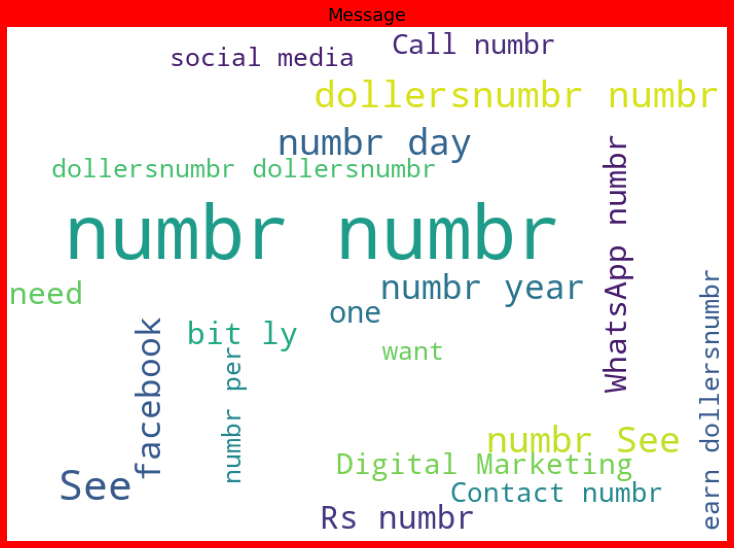

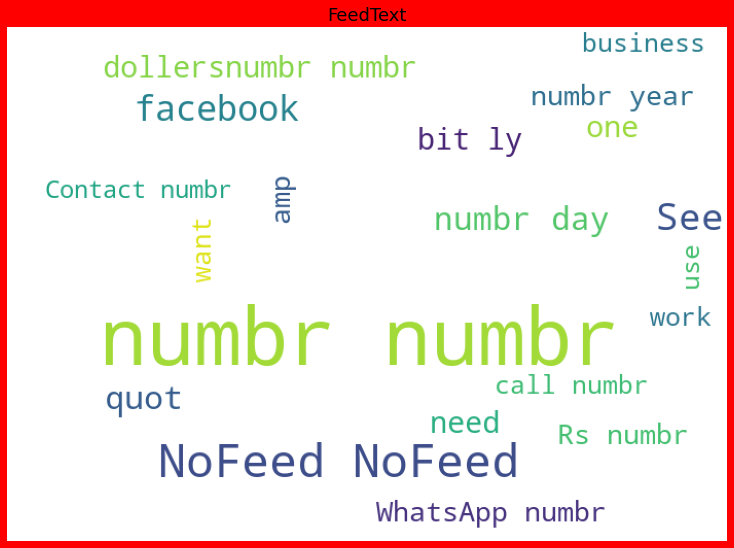

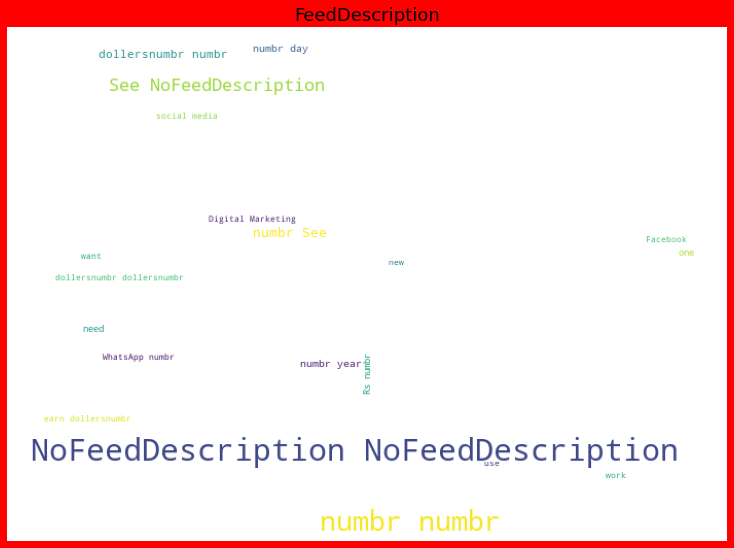

In [14]:
# Getting sense of loud words 



msg =['Message',"FeedText","FeedDescription"]
for i in msg:
    cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(df[i]))

    plt.figure(figsize=(10,8),facecolor='r')
    plt.title(i,fontsize=18)
    plt.imshow(cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

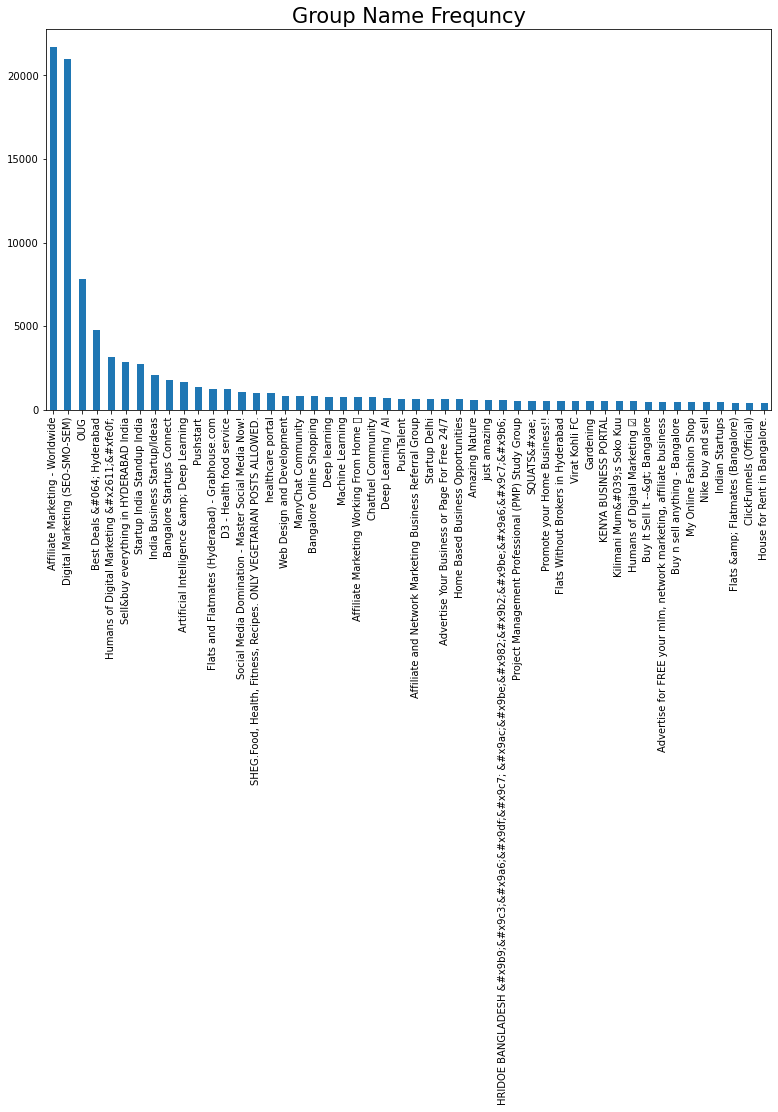

In [15]:
# top 50 group name frequency

plt.figure(figsize=(13,7))
df['GroupName'].value_counts()[:50].plot(kind='bar')
plt.title("Group Name Frequncy",fontsize=21)
plt.show()

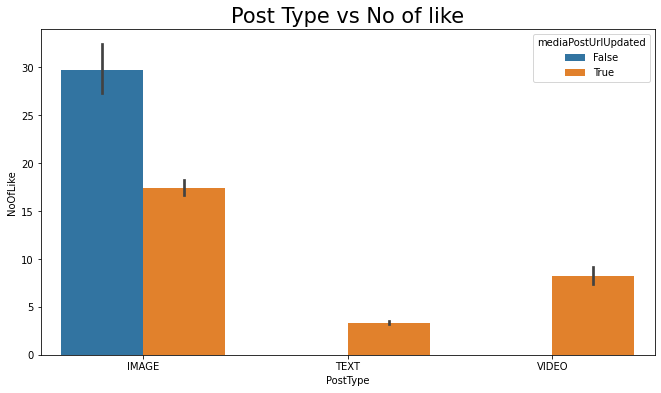

In [16]:
# plotting bargraph

plt.figure(figsize=(11,6))
sns.barplot(x=df["PostType"],y=df["NoOfLike"],hue=df["mediaPostUrlUpdated"])
plt.title("Post Type vs No of like",fontsize=21)
plt.show()

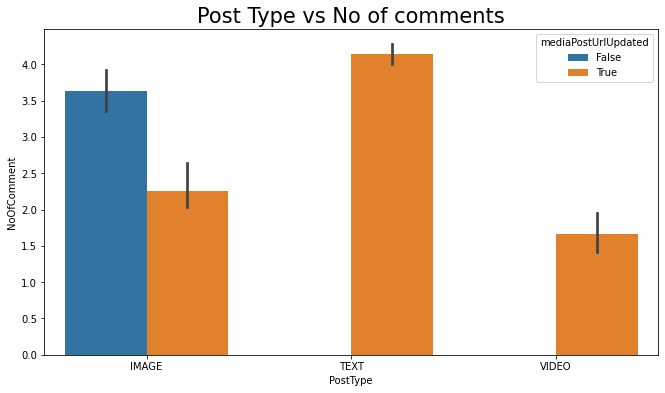

In [17]:
## plotting bargraph

plt.figure(figsize=(11,6))
sns.barplot(x=df["PostType"],y=df["NoOfComment"],hue=df["mediaPostUrlUpdated"])
plt.title("No Of Comment")
plt.title("Post Type vs No of comments",fontsize=21)
plt.show()

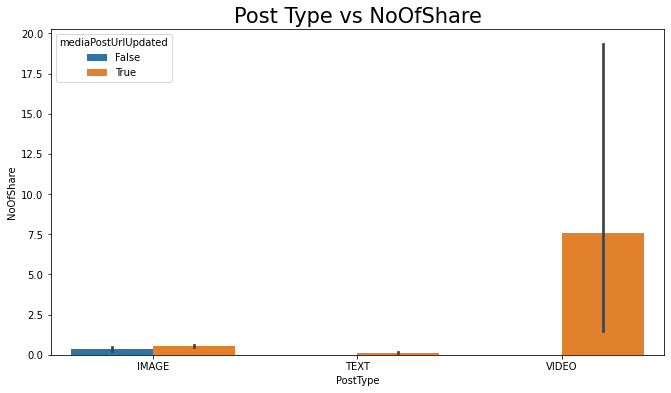

In [18]:
# plotting bargraph

plt.figure(figsize=(11,6))
sns.barplot(x=df["PostType"],y=df["NoOfShare"],hue=df["mediaPostUrlUpdated"])
plt.title("No Of Comment")
plt.title("Post Type vs NoOfShare",fontsize=21)
plt.show()

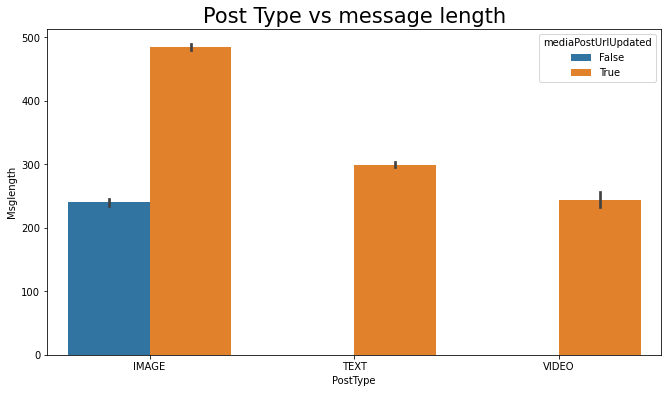

In [19]:
# plotting bargraph

plt.figure(figsize=(11,6))
sns.barplot(x=df["PostType"],y=df["Msglength"],hue=df["mediaPostUrlUpdated"])
plt.title("Post Type vs message length",fontsize=21)
plt.show()

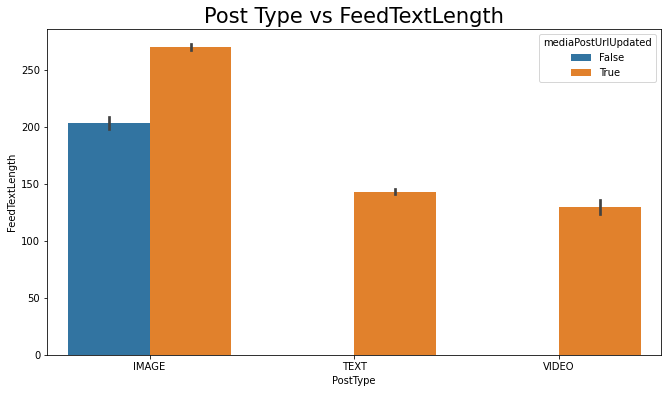

In [20]:
# plotting bargraph

plt.figure(figsize=(11,6))
sns.barplot(x=df["PostType"],y=df["FeedTextLength"],hue=df["mediaPostUrlUpdated"])
plt.title("Post Type vs FeedTextLength",fontsize=21)
plt.show()

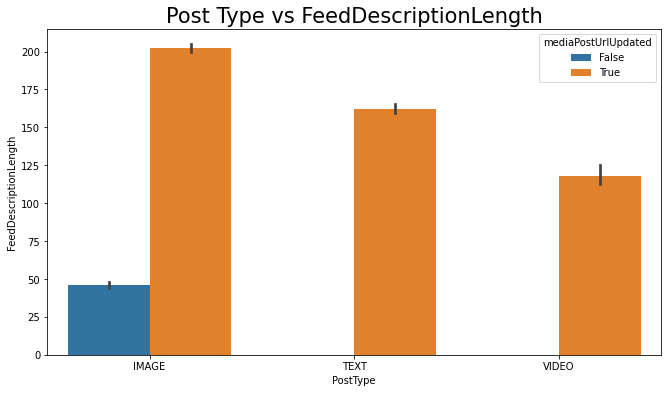

In [21]:
# plotting bargraph

plt.figure(figsize=(11,6))
sns.barplot(x=df["PostType"],y=df["FeedDescriptionLength"],hue=df["mediaPostUrlUpdated"])
plt.title("Post Type vs FeedDescriptionLength",fontsize=21)
plt.show()

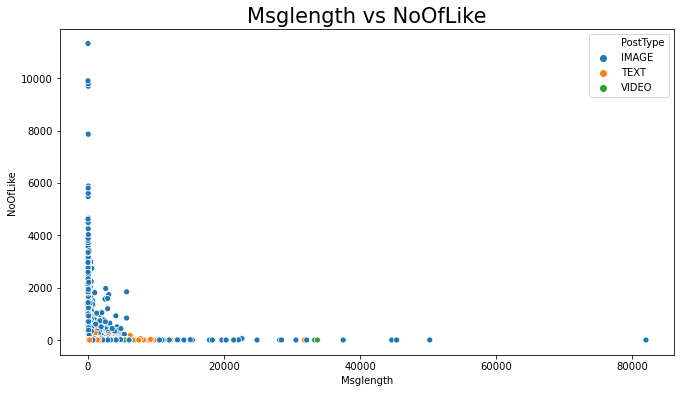

In [22]:
# See scatterplots

plt.figure(figsize=(11,6))
sns.scatterplot(x=df["Msglength"],y=df["NoOfLike"],hue=df["PostType"])
plt.title("Msglength vs NoOfLike",fontsize=21)
plt.show()

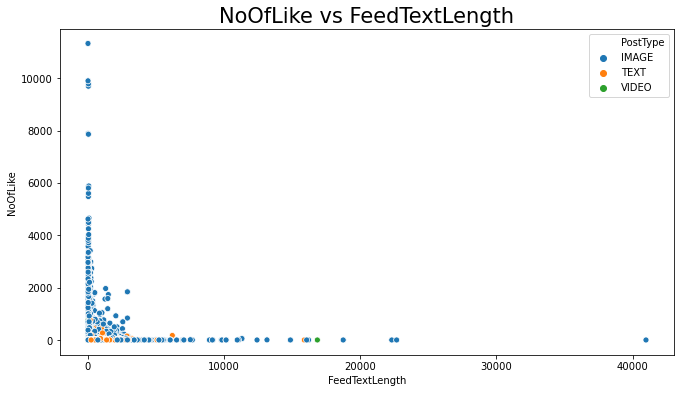

In [23]:
# See scatterplot

plt.figure(figsize=(11,6))
sns.scatterplot(x=df["FeedTextLength"],y=df["NoOfLike"],hue=df["PostType"])
plt.title("NoOfLike vs FeedTextLength",fontsize=21)
plt.show()

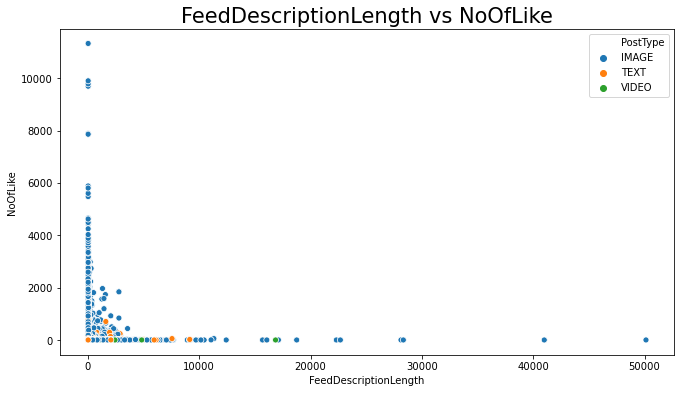

In [24]:
# ploting scatterplot

plt.figure(figsize=(11,6))
sns.scatterplot(x=df["FeedDescriptionLength"],y=df["NoOfLike"],hue=df["PostType"])
plt.title("FeedDescriptionLength vs NoOfLike",fontsize=21)
plt.show()

In [25]:
# create separate column for text 

df["AllFeedMessage"]=df["Message"]+df["FeedText"]

## Model Building

In [36]:
# Convert text into vectors using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score
tf_vec = TfidfVectorizer(smooth_idf=False)

features = tf_vec.fit_transform(df['AllFeedMessage'])
features

<201856x385967 sparse matrix of type '<class 'numpy.float64'>'
	with 5486482 stored elements in Compressed Sparse Row format>

In [27]:
# find best k 

wcss=[]

for i in range(1,11):
    kmean=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmean.fit(features)
    wcss.append(kmean.inertia_)
    

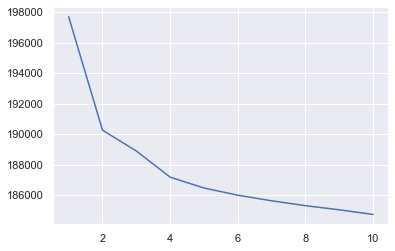

In [28]:
# ploting Elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.show()

In [29]:
# create final model with n_clusters=4

kmeans=KMeans(n_clusters=4,init="k-means++",random_state=0)
kmodel=kmeans.fit(features)            

In [30]:
# predict values

y=kmodel.fit_predict(features)
print(y)

[1 1 1 ... 1 2 1]


In [31]:
# add clusters in df

df["Intents Clusters"]=y
df.to_csv('dataframe.csv')
df["Intents Clusters"].value_counts()



1    152506
2     39792
0      7655
3      1903
Name: Intents Clusters, dtype: int64

In [32]:
# saving the model in pickle file

import joblib
joblib.dump(kmodel,"IntentsOfSentences.pkl")

['IntentsOfSentences.pkl']

In [38]:
# creating final dataframe with labels

df_final=pd.DataFrame()
df_final["Message"]=df["AllFeedMessage"]
df_final["Clusters"]=y
df_final.to_csv("final_df.csv")

###                                                  ------ o ------